In [1]:
import torch
from sklearn.datasets import make_moons

# Generate the synthetic dataset
X_np, y_np = make_moons(n_samples=1000, noise=0.15, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).unsqueeze(1)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")
print(f"Data type of features (X): {X.dtype}")
print(f"Data type of labels (y): {y.dtype}")

Shape of features (X): torch.Size([1000, 2])
Shape of labels (y): torch.Size([1000, 1])
Data type of features (X): torch.float32
Data type of labels (y): torch.float32


In [2]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(hidden_size, output_size) # Hidden layer to output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))    # Apply ReLU after first linear layer
        x = torch.tanh(self.fc2(x)) # Apply Tanh after second linear layer
        x = torch.sigmoid(self.fc3(x)) # Apply Sigmoid for binary classification output
        return x

print("MLP class defined successfully with ReLU, Tanh, and Sigmoid activations.")

MLP class defined successfully with ReLU, Tanh, and Sigmoid activations.


In [3]:
import torch.optim as optim

# 1. Instantiate the MLP model
input_size = X.shape[1] # 2 features
hidden_size = 64
output_size = 1 # Binary classification
model = MLP(input_size, hidden_size, output_size)

# 2. Define the loss function
criterion = nn.BCELoss()

# 3. Define the optimizer
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 4. Set the number of training epochs
num_epochs = 1000

# 5. Create an empty list to store loss history
loss_history = []

print("Starting MLP training...")

# 6. Implement the training loop
for epoch in range(num_epochs):
    # a. Forward pass
    outputs = model(X)

    # b. Calculate the loss
    loss = criterion(outputs, y)

    # c. Store the loss value
    loss_history.append(loss.item())

    # d. Zero the gradients
    optimizer.zero_grad()

    # e. Backward pass
    loss.backward()

    # f. Update the model's weights
    optimizer.step()

    # g. Optionally, print the loss every few epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 7. Print a message indicating training is complete
print("MLP training complete.")

Starting MLP training...
Epoch [100/1000], Loss: 0.0118
Epoch [200/1000], Loss: 0.0093
Epoch [300/1000], Loss: 0.0083
Epoch [400/1000], Loss: 0.0076
Epoch [500/1000], Loss: 0.0068
Epoch [600/1000], Loss: 0.0061
Epoch [700/1000], Loss: 0.0053
Epoch [800/1000], Loss: 0.0044
Epoch [900/1000], Loss: 0.0037
Epoch [1000/1000], Loss: 0.0031
MLP training complete.


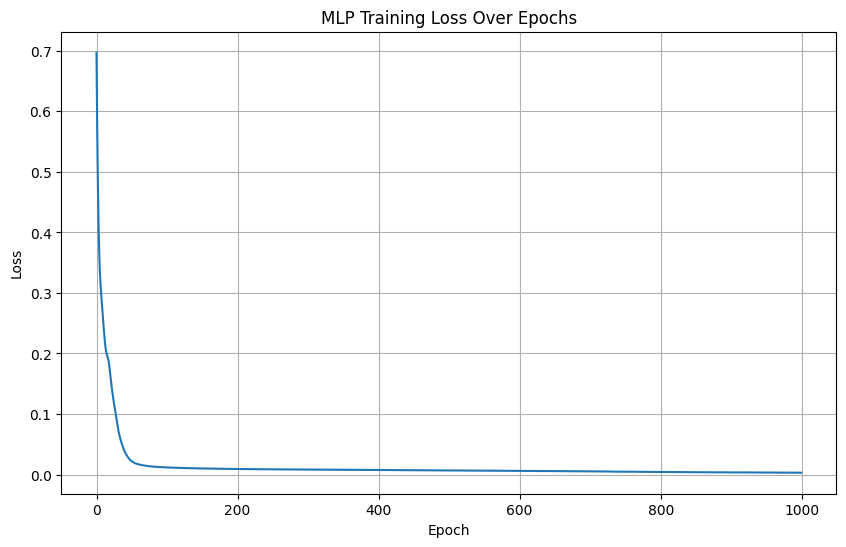

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(num_epochs), y=loss_history)

# Add title and labels
plt.title('MLP Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

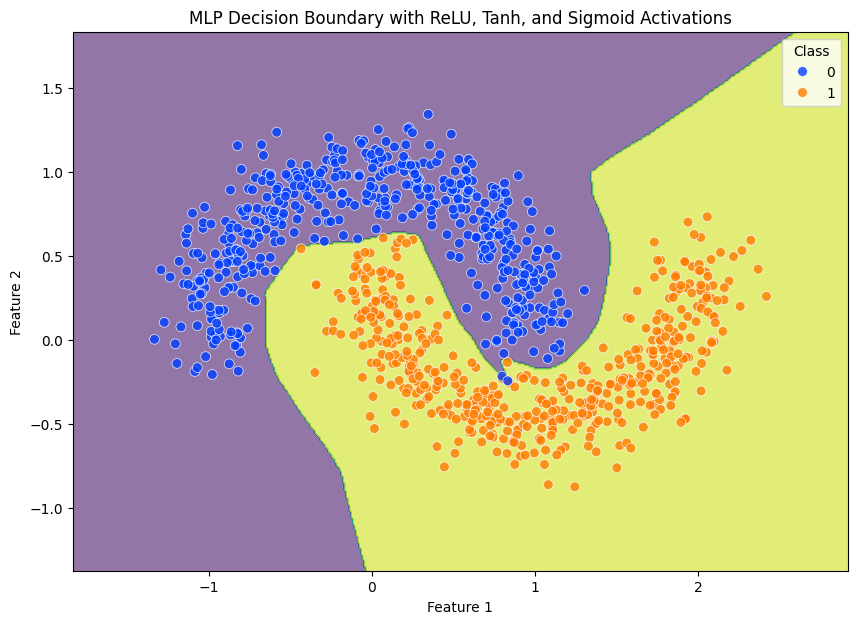

Decision boundary visualization complete.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the model to evaluation mode
model.eval()

# 2. Define the minimum and maximum values for the x and y axes
x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5

# 3. Create a meshgrid to generate points across the entire feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 4. Convert the meshgrid points into a PyTorch tensor
meshgrid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# 5. Pass the meshgrid tensor through the trained model to get raw predictions
with torch.no_grad():
    Z = model(meshgrid_tensor)

# 6. Convert the predictions back to a NumPy array, reshape, and apply threshold
Z_np = Z.numpy().reshape(xx.shape)
Z_binary = (Z_np > 0.5).astype(int)

# Create a figure and an axes object
plt.figure(figsize=(10, 7))

# 7. Create a contour plot to visualize the decision boundary
plt.contourf(xx, yy, Z_binary, cmap='viridis', alpha=0.6)

# 8. Create a scatter plot of the original synthetic data points
sns.scatterplot(x=X_np[:, 0], y=X_np[:, 1], hue=y_np, palette='bright', s=50, alpha=0.8)

# 9. Add title to the plot
plt.title('MLP Decision Boundary with ReLU, Tanh, and Sigmoid Activations')

# 10. Add labels to the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 11. Add a legend
plt.legend(title='Class')

# 12. Display the plot
plt.show()

print("Decision boundary visualization complete.")

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation_fn = activation_fn # Store the activation function

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))    # Apply the specified activation after fc1
        x = self.activation_fn(self.fc2(x))    # Apply the specified activation after fc2
        x = torch.sigmoid(self.fc3(x))         # Apply Sigmoid for binary classification output
        return x

print("MLP class redefined successfully to accept a single activation function.")

MLP class redefined successfully to accept a single activation function.


In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 2. Set the input_size, hidden_size, and output_size for the MLP model.
input_size = X.shape[1] # 2 features
hidden_size = 64
output_size = 1 # Binary classification

# 3. Instantiate the MLP model, passing F.relu as the activation_fn argument.
model_relu = MLP(input_size, hidden_size, output_size, F.relu)

# 4. Define the loss function using nn.BCELoss().
criterion_relu = nn.BCELoss()

# 5. Define the optimizer using optim.Adam with the model's parameters and a learning rate.
learning_rate = 0.01
optimizer_relu = optim.Adam(model_relu.parameters(), lr=learning_rate)

# 6. Set the number of training epochs
num_epochs = 1000

# 7. Create an empty list to store loss history
relu_loss_history = []

print("Starting MLP training with ReLU activation...")

# 8. Implement the training loop
for epoch in range(num_epochs):
    # a. Forward pass
    outputs = model_relu(X)

    # b. Calculate the loss
    loss = criterion_relu(outputs, y)

    # c. Store the loss value
    relu_loss_history.append(loss.item())

    # d. Zero the gradients
    optimizer_relu.zero_grad()

    # e. Backward pass
    loss.backward()

    # f. Update the model's weights
    optimizer_relu.step()

    # g. Optionally, print the loss every few epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("MLP training with ReLU activation complete.")

Starting MLP training with ReLU activation...
Epoch [100/1000], Loss: 0.0133
Epoch [200/1000], Loss: 0.0102
Epoch [300/1000], Loss: 0.0089
Epoch [400/1000], Loss: 0.0080
Epoch [500/1000], Loss: 0.0072
Epoch [600/1000], Loss: 0.0067
Epoch [700/1000], Loss: 0.0061
Epoch [800/1000], Loss: 0.0052
Epoch [900/1000], Loss: 0.0044
Epoch [1000/1000], Loss: 0.0037
MLP training with ReLU activation complete.


In [8]:
import torch.nn.functional as F

# 1. Instantiate the MLP model, passing F.sigmoid as the activation_fn argument.
model_sigmoid = MLP(input_size, hidden_size, output_size, F.sigmoid)

# 2. Define the loss function using nn.BCELoss().
criterion_sigmoid = nn.BCELoss()

# 3. Define the optimizer using optim.Adam with the model's parameters and a learning rate.
optimizer_sigmoid = optim.Adam(model_sigmoid.parameters(), lr=learning_rate)

# 4. Create an empty list to store loss history
sigmoid_loss_history = []

print("Starting MLP training with Sigmoid activation...")

# 5. Implement the training loop
for epoch in range(num_epochs):
    # a. Forward pass
    outputs = model_sigmoid(X)

    # b. Calculate the loss
    loss = criterion_sigmoid(outputs, y)

    # c. Store the loss value
    sigmoid_loss_history.append(loss.item())

    # d. Zero the gradients
    optimizer_sigmoid.zero_grad()

    # e. Backward pass
    loss.backward()

    # f. Update the model's weights
    optimizer_sigmoid.step()

    # g. Optionally, print the loss every few epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("MLP training with Sigmoid activation complete.")

Starting MLP training with Sigmoid activation...
Epoch [100/1000], Loss: 0.2612
Epoch [200/1000], Loss: 0.0498
Epoch [300/1000], Loss: 0.0241
Epoch [400/1000], Loss: 0.0196
Epoch [500/1000], Loss: 0.0175
Epoch [600/1000], Loss: 0.0159
Epoch [700/1000], Loss: 0.0149
Epoch [800/1000], Loss: 0.0142
Epoch [900/1000], Loss: 0.0137
Epoch [1000/1000], Loss: 0.0131
MLP training with Sigmoid activation complete.


In [9]:
import torch.nn.functional as F

# 1. Instantiate the MLP model, passing F.tanh as the activation_fn argument.
model_tanh = MLP(input_size, hidden_size, output_size, F.tanh)

# 2. Define the loss function using nn.BCELoss().
criterion_tanh = nn.BCELoss()

# 3. Define the optimizer using optim.Adam with the model's parameters and a learning rate.
optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=learning_rate)

# 4. Create an empty list to store loss history
tanh_loss_history = []

print("Starting MLP training with Tanh activation...")

# 5. Implement the training loop
for epoch in range(num_epochs):
    # a. Forward pass
    outputs = model_tanh(X)

    # b. Calculate the loss
    loss = criterion_tanh(outputs, y)

    # c. Store the loss value
    tanh_loss_history.append(loss.item())

    # d. Zero the gradients
    optimizer_tanh.zero_grad()

    # e. Backward pass
    loss.backward()

    # f. Update the model's weights
    optimizer_tanh.step()

    # g. Optionally, print the loss every few epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("MLP training with Tanh activation complete.")

Starting MLP training with Tanh activation...
Epoch [100/1000], Loss: 0.0229
Epoch [200/1000], Loss: 0.0141
Epoch [300/1000], Loss: 0.0113
Epoch [400/1000], Loss: 0.0096
Epoch [500/1000], Loss: 0.0081
Epoch [600/1000], Loss: 0.0068
Epoch [700/1000], Loss: 0.0059
Epoch [800/1000], Loss: 0.0053
Epoch [900/1000], Loss: 0.0048
Epoch [1000/1000], Loss: 0.0042
MLP training with Tanh activation complete.


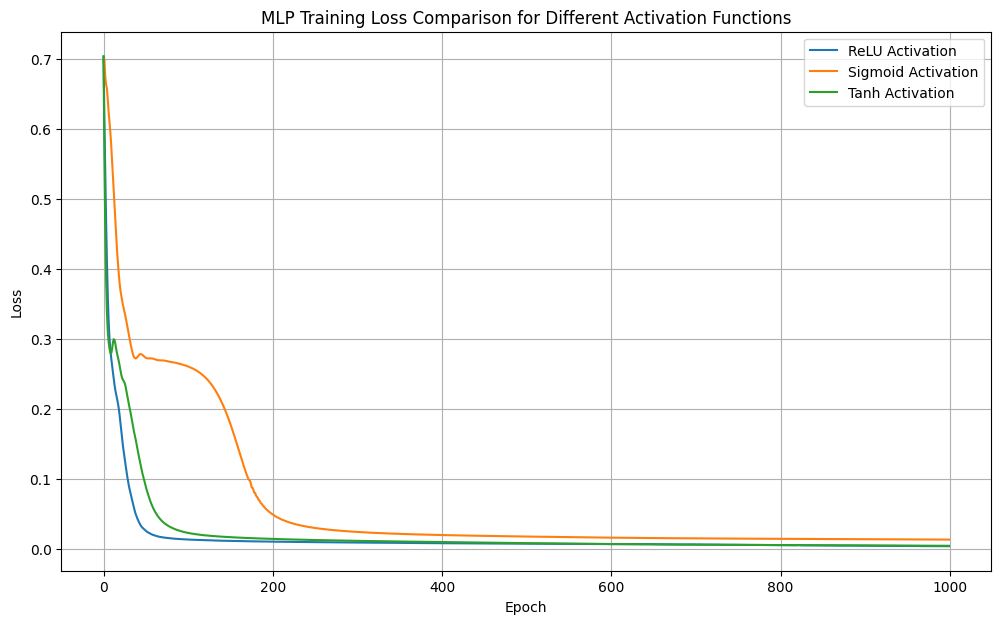

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(12, 7))

# Plot the loss history for each model
sns.lineplot(x=range(num_epochs), y=relu_loss_history, label='ReLU Activation')
sns.lineplot(x=range(num_epochs), y=sigmoid_loss_history, label='Sigmoid Activation')
sns.lineplot(x=range(num_epochs), y=tanh_loss_history, label='Tanh Activation')

# Add title and labels
plt.title('MLP Training Loss Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

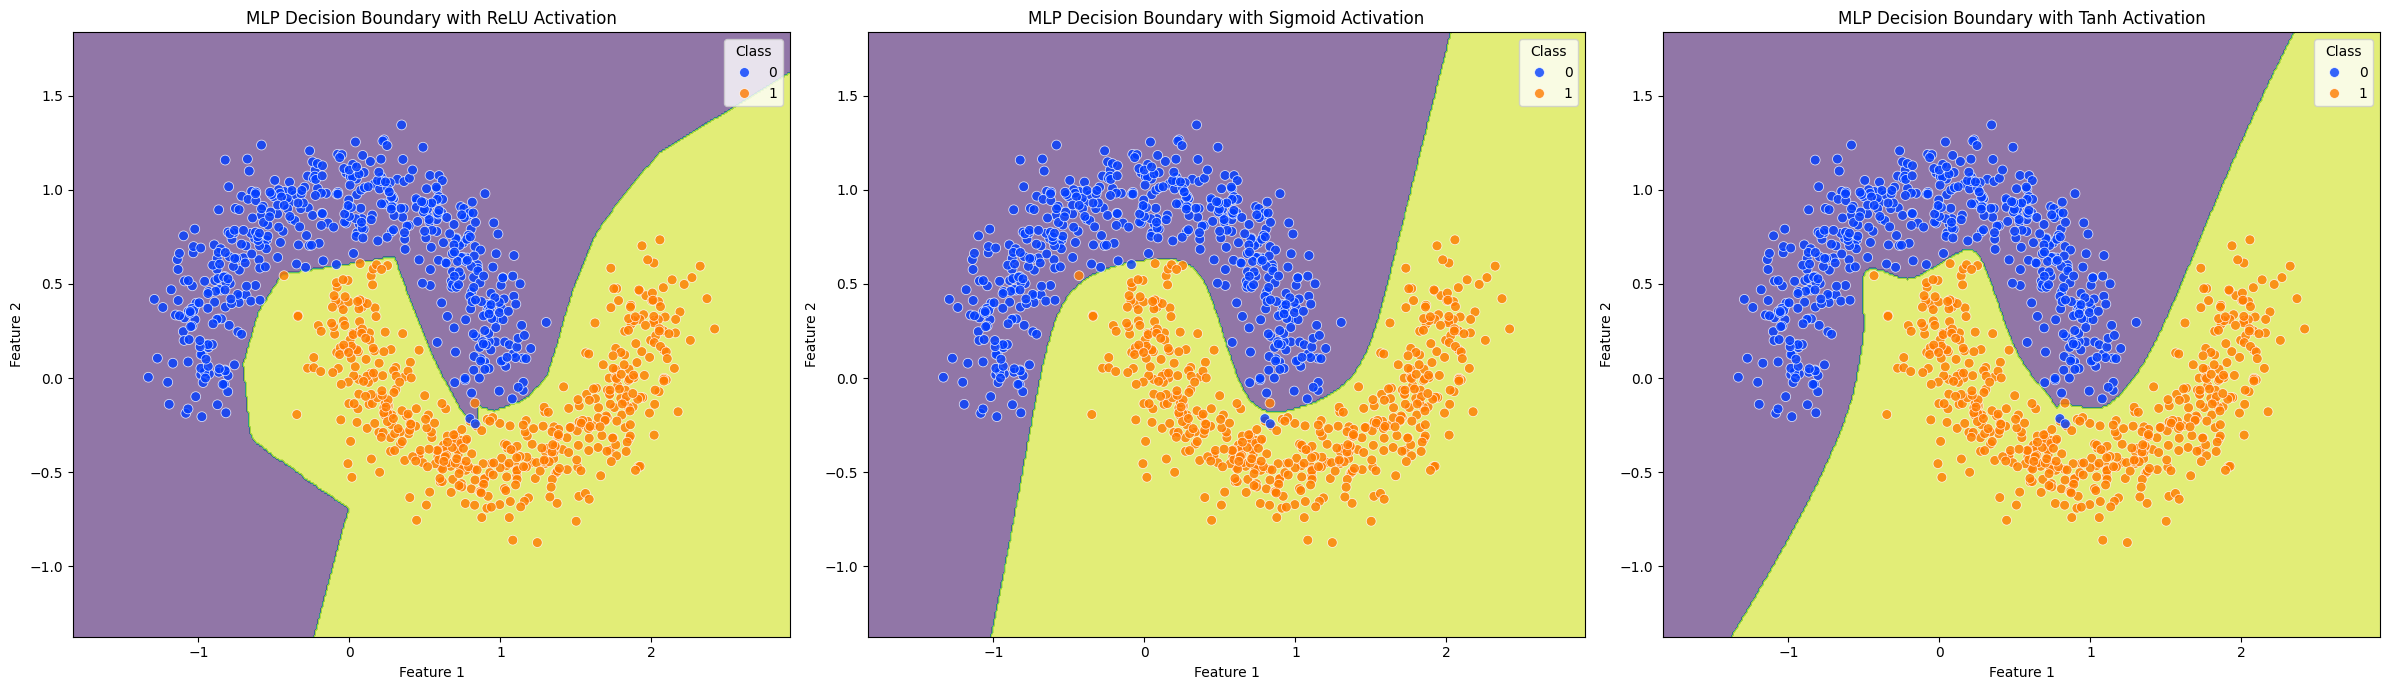

Decision boundary visualizations for all models complete.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set all three trained models to evaluation mode
model_relu.eval()
model_sigmoid.eval()
model_tanh.eval()

# 2. Define the minimum and maximum values for the x and y axes
x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5

# 3. Create a meshgrid to generate points across the entire feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 4. Convert the meshgrid points into a PyTorch tensor
meshgrid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# 5. Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# List of models and their names for iteration
models = [(model_relu, 'ReLU Activation'),
          (model_sigmoid, 'Sigmoid Activation'),
          (model_tanh, 'Tanh Activation')]

for i, (model, title_suffix) in enumerate(models):
    # a. Pass the meshgrid tensor through the respective trained model
    with torch.no_grad():
        Z = model(meshgrid_tensor)

    # b. Convert the predictions back to a NumPy array, reshape, and apply threshold
    Z_np = Z.numpy().reshape(xx.shape)
    Z_binary = (Z_np > 0.5).astype(int)

    # c. In the corresponding subplot, create a contour plot
    axes[i].contourf(xx, yy, Z_binary, cmap='viridis', alpha=0.6)

    # d. On the same subplot, create a scatter plot of the original synthetic data points
    sns.scatterplot(x=X_np[:, 0], y=X_np[:, 1], hue=y_np, palette='bright', s=50, alpha=0.8, ax=axes[i])

    # e. Add a title to each subplot
    axes[i].set_title(f'MLP Decision Boundary with {title_suffix}')

    # f. Add labels for the x and y axes
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

    # g. Add a legend to each subplot
    axes[i].legend(title='Class')

# 7. Adjust the layout of the subplots
plt.tight_layout()

# 8. Display the plot
plt.show()

print("Decision boundary visualizations for all models complete.")